In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification


In [2]:

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:


df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.170055,3.278040,-2.413039,2.611308,0.560954,1
1,-1.782657,-1.731263,0.995839,0.608071,2.872491,1
2,-1.576561,-0.071412,1.009467,-1.487527,1.135272,1
3,-1.689133,2.643529,-0.070827,0.809803,-0.052355,0
4,-2.653559,2.833059,1.526554,0.394331,-1.489441,0


In [4]:
##funciton for row sampling, we give input in what $ of sample row we want to give from originaldata
#50%-> 50 rows ,out of 100

def  sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling, same as row but for columns

# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:

# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


In [7]:
df1=sample_rows(df,0.1)
df1
#gives  10rows of  out  total(thisis withreplacement, so duplicates  may  occur)

,col1,col2,col3,col4,col5,target
73,-1.171922,-0.045054,1.104023,-1.814748,0.673975,1
91,-0.294137,1.880459,-1.248536,1.703457,1.606232,0
61,0.294922,-0.337056,0.085891,-2.019241,-0.257155,1
95,-1.990476,0.844785,0.132025,0.187459,1.483678,0
20,-2.083367,-1.853315,1.560263,-0.706614,0.632110,1
90,-0.661380,-0.875121,0.065723,-1.647217,-0.241243,1
41,-3.156891,-1.538340,1.231974,0.126888,2.044934,1
0,-0.170055,3.278040,-2.413039,2.611308,0.560954,1
54,-0.442094,0.471335,1.205543,-1.912190,1.262239,1
91,-0.294137,1.880459,-1.248536,1.703457,1.606232,0


In [8]:
df2=sample_rows(df,0.1)
df2

,col1,col2,col3,col4,col5,target
88,-4.575565,-3.749191,2.207009,1.836264,2.741526,1
16,-0.309426,1.057379,1.718062,1.167597,-1.454627,0
5,-0.435019,0.241121,1.559521,-3.016854,-0.819429,1
51,-3.012415,-0.414399,0.938510,-1.504080,0.460485,1
87,-0.267037,-0.211888,1.325323,-1.247690,1.700866,1
88,-4.575565,-3.749191,2.207009,1.836264,2.741526,1
76,-1.655777,-0.967704,0.364510,-0.779123,1.002777,1
24,-2.098635,2.120822,3.791638,0.465011,0.970475,0
40,-0.911161,1.550026,1.676259,1.640842,2.089465,0
19,-0.500854,2.494579,-0.224408,2.150807,-0.584035,0


In [9]:
df3=sample_rows(df,0.1)
df3

,col1,col2,col3,col4,col5,target
65,-2.792637,1.153007,4.223962,0.113445,0.789012,0
27,-0.691297,-0.353384,-0.409264,-1.281501,0.752526,1
44,-0.953549,-1.554148,1.459891,-1.719929,-0.696310,1
44,-0.953549,-1.554148,1.459891,-1.719929,-0.696310,1
53,0.654403,1.941435,-2.416908,2.871955,1.281158,0
63,-1.728272,-1.216327,0.830989,-0.582023,1.294498,1
18,-0.908050,-1.254810,1.139079,-1.355663,0.175770,1
22,0.599551,0.039654,-0.730147,-1.893964,0.158010,1
3,-1.689133,2.643529,-0.070827,0.809803,-0.052355,0
97,0.291447,-1.591061,0.126736,-0.637805,0.799724,1


In [10]:
df1.shape

(10, 6)

In [11]:
df2.shape

(10, 6)

In [12]:
df3.shape

(10, 6)

In [13]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [14]:

clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [15]:


from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[4] <= 1.373\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -0.347\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

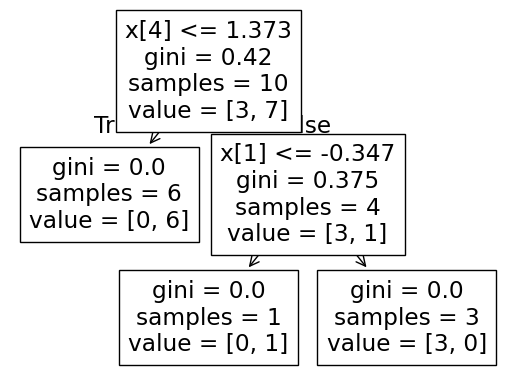

In [16]:

plot_tree(clf1)

[Text(0.5, 0.75, 'x[1] <= 0.649\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

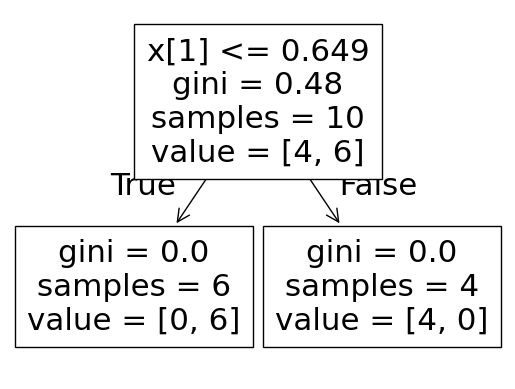

In [17]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[3] <= -0.234\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

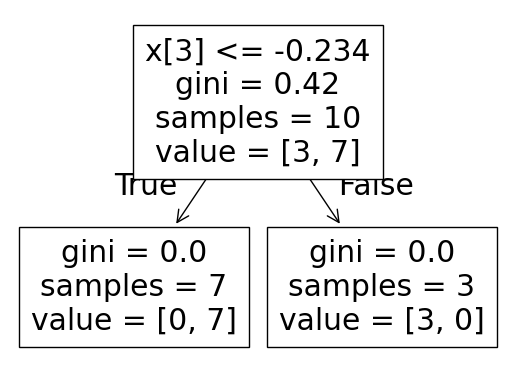

In [18]:
plot_tree(clf3)

In [20]:
clf1.predict(np.array([3.283263	,-1.834806	,-3.187091	,-2.605375,	-1.262203	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
clf2.predict(np.array([3.283263	,-1.834806	,-3.187091	,-2.605375,	-1.262203	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
clf3.predict(np.array([3.283263	,-1.834806	,-3.187091	,-2.605375,	-1.262203	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
##since majority  of models say 1, its should be 1(output)
#thats show row sampling works

In [26]:
#similary  using  sample_features, we can do column sampling and combined  sampling...